# Linear regression with multiple features
(based on Andrew Ng coursera Machine Learning course)

---

In [50]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

## Display plots inline

In [51]:
%matplotlib inline
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = 16, 10

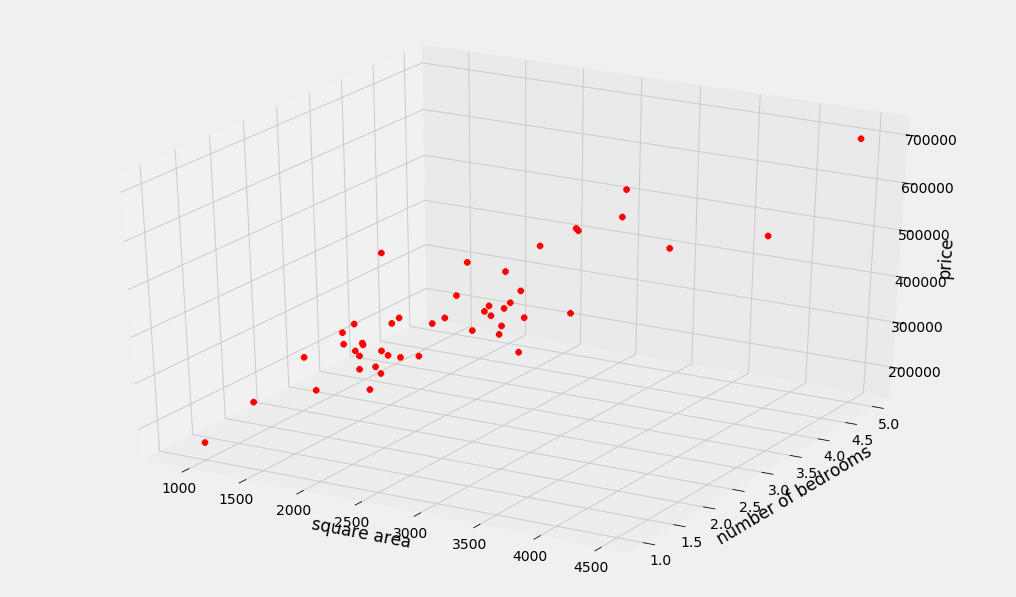

In [52]:
data = pd.read_csv('ex1data2.txt', header = None)
data.columns = ['square area', 'number of bedrooms', 'price']
        
ax = plt.axes(projection = '3d')
ax.scatter(data['square area'], data['number of bedrooms'], data['price'], c = 'r', alpha = 1, marker = 'x')
ax.set_xlabel('square area')
ax.set_ylabel('number of bedrooms')
ax.set_zlabel('price')
plt.show()

## Feature normalization

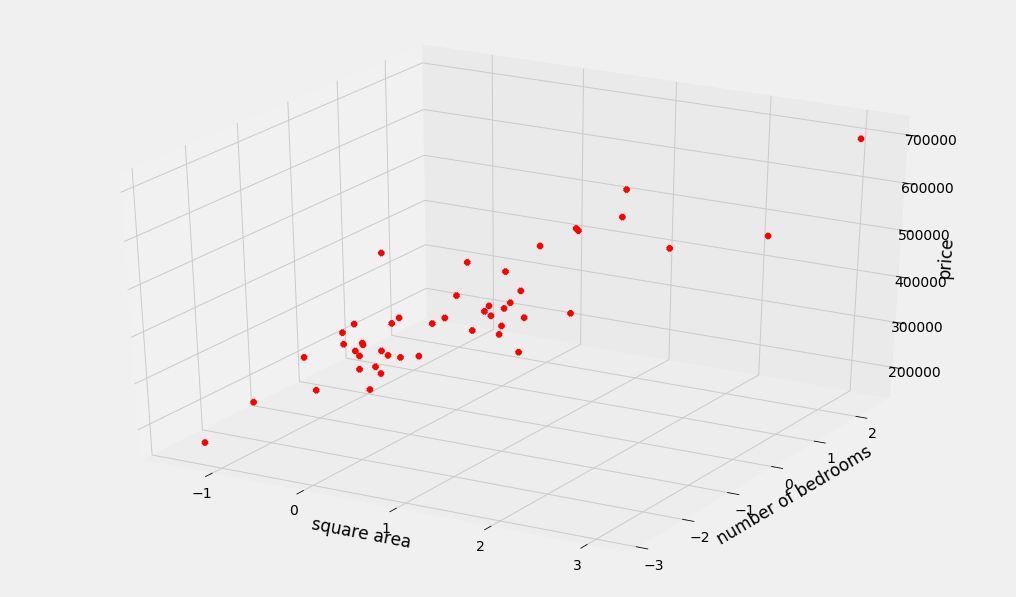

In [53]:
X = np.array([data['square area'], data['number of bedrooms']]).T
y = np.array([data['price']]).T

mu = np.mean(X, axis = 0)
sigma = np.std(X, axis = 0, ddof = 1) #delta degree of freedom ot fit into octave results
X = (X - mu)/sigma

ax = plt.axes(projection = '3d')
ax.scatter(X[:,0], X[:,1], y, c = 'r', alpha = 1, marker = 'x', edgecolor = 'none');
ax.set_xlabel('square area')
ax.set_ylabel('number of bedrooms')
ax.set_zlabel('price')
plt.show()

## Cost function

In [54]:
def cost_func(X, y, theta) :
    return (0.5 / X.shape[0]) * np.sum((np.dot(X, theta) - y) ** 2, dtype = float) 

## Gradient discent

In [55]:
def gradient_discent(X, y, theta, alpha, iterations) :
    J_history = np.zeros((iterations, 1))
    m = X.shape[0]
    for i in range(iterations):
        J_der = np.dot(X, theta) - y
        theta = theta - (alpha / m) * np.dot(J_der.T, X).T
        J_history[i] = cost_func(X, y, theta)
    return theta, J_history 

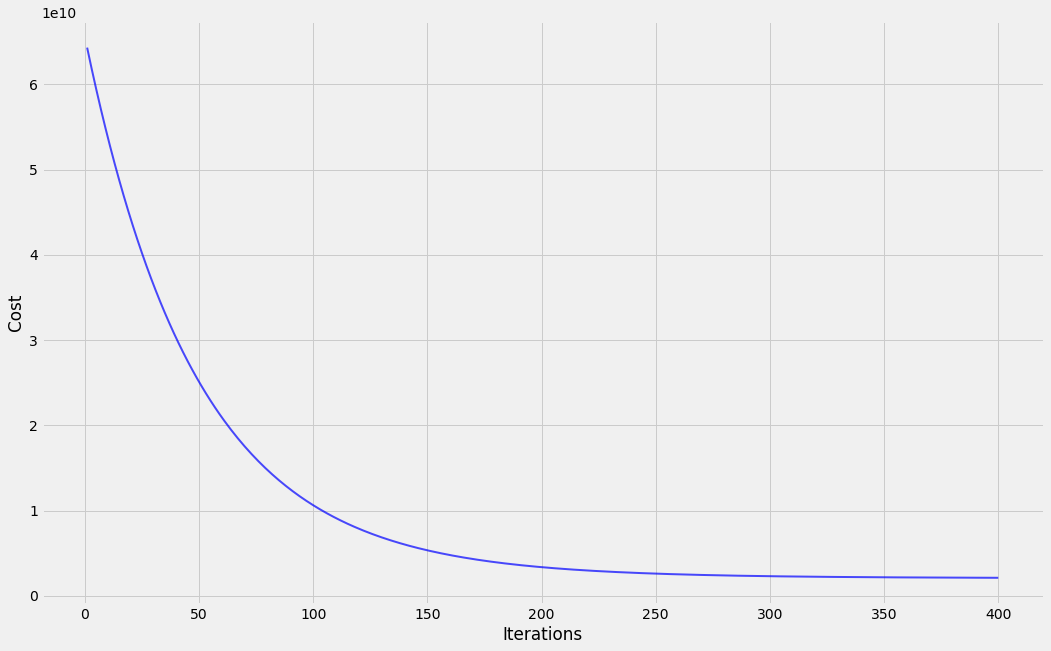

In [56]:
alpha = 0.01
iterations = 400
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
theta = np.zeros((X.shape[1], 1))

[theta, J_history] = gradient_discent(X, y, theta, alpha, iterations)

plt.plot(np.linspace(1, 400, 400), J_history, 'b', alpha = 0.7, label = 'function',  linewidth = 2)
theta #plot that shows convergens of cost function
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [57]:
theta

array([[334302.06399328],
       [100087.11600585],
       [  3673.54845093]])

In [58]:
Y = np.zeros((X.shape[0], 1))
for i in range(X.shape[0]):
    Y[i] = np.dot(X[i], theta) 
Y = np.meshgrid(Y[:,0], Y[:,0])[0]
X1, X2 = np.meshgrid(X[:,1], X[:,2])

Text(0.5, 0, 'price')

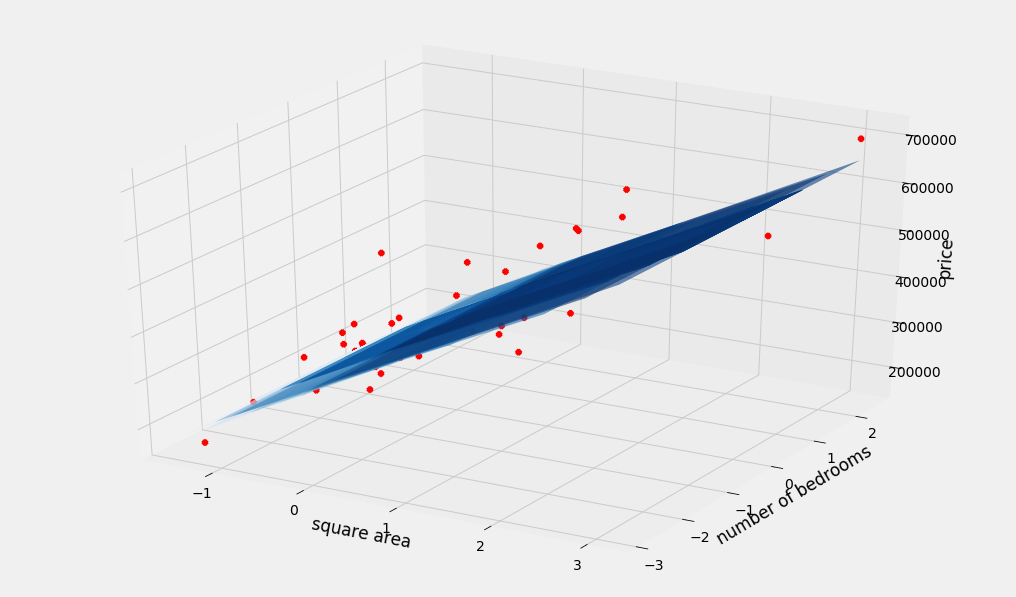

In [59]:
ax = plt.axes(projection = '3d')
ax.scatter(X[:,1], X[:,2], y, c = 'r', alpha = 1, marker = 'x', edgecolor = 'none');
ax.plot_surface(X1, X2, Y, cmap = 'Blues', alpha = 0.2)
# ax.view_init(5, -90)
ax.set_xlabel('square area')
ax.set_ylabel('number of bedrooms')
ax.set_zlabel('price')

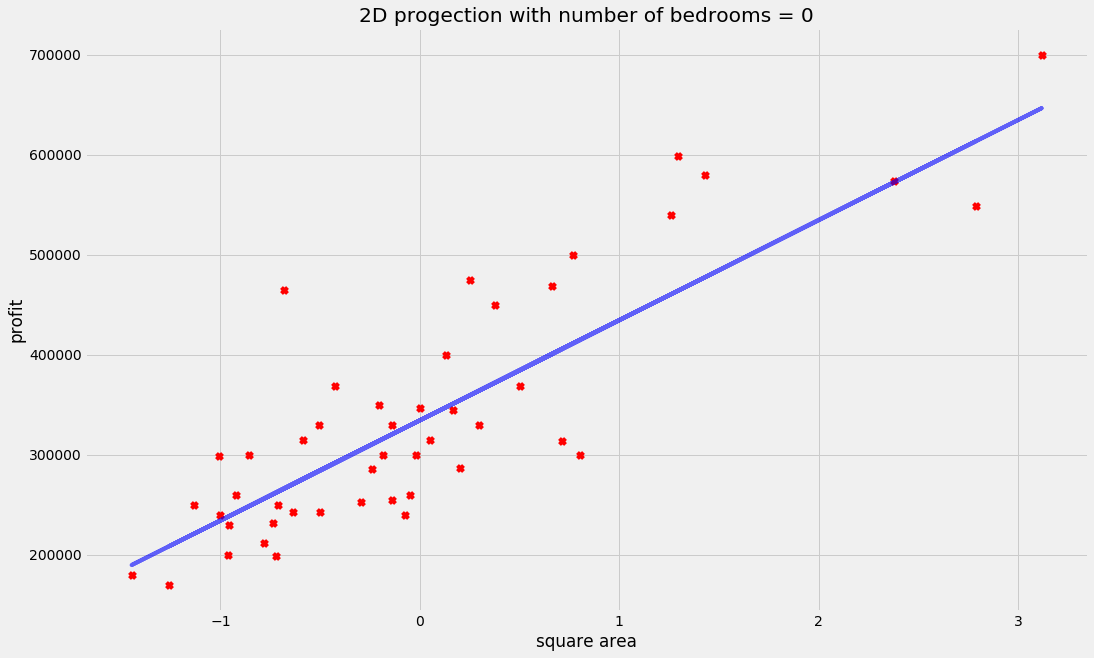

In [60]:
X1 = X
X1[:,2][:] = 0
plt.scatter(X[:,1], y, c = 'r', alpha = 1, marker = 'x', edgecolor = 'none');
plt.plot(X[:,1], np.dot(X1, theta), c = 'b', alpha = 0.6)
plt.xlabel('square area')
plt.ylabel('profit')
plt.title('2D progection with number of bedrooms = 0')
plt.show()